#### importing the required libraries 

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD 
from keras.regularizers import L2

#### importing the dataset 

In [2]:
df=pd.read_csv(r"D:\edu\INNO\Deep_Learning\Assignments\data\Multiple CSV\Multiple CSV\4.linearsep.csv",header=None)
df.head()

,0,1,2
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


In [3]:
#renaming columns properly
df.columns=["feature_1","feature_2","label"] 
df.head() 

,feature_1,feature_2,label
0,-0.177497,0.930496,1.0
1,1.977424,1.766155,0.0
2,1.800024,1.700343,0.0
3,-0.770837,2.359163,1.0
4,-0.308009,1.594063,1.0


#### checking label counts 

In [92]:
df["label"].value_counts()

label
1.0    50
0.0    50
Name: count, dtype: int64

<Axes: >

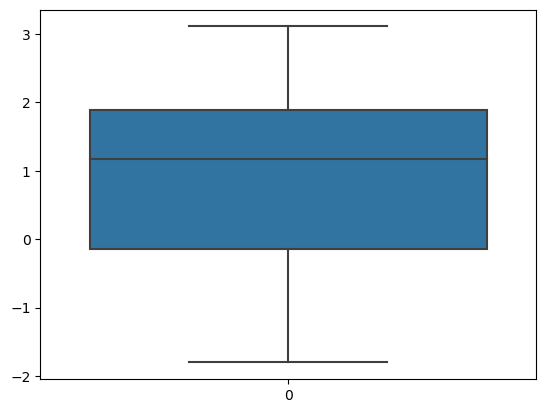

In [95]:
sns.boxplot(df["feature_1"])

<Axes: >

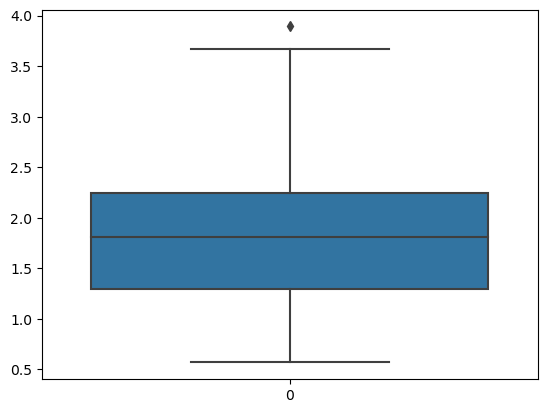

In [96]:
sns.boxplot(df["feature_2"])

In [97]:
## removing the outlier datapoints
df=df[df["feature_2"]<3.75]

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  99 non-null     float64
 1   feature_2  99 non-null     float64
 2   label      99 non-null     float64
dtypes: float64(3)
memory usage: 3.1 KB


<Axes: xlabel='feature_1', ylabel='feature_2'>

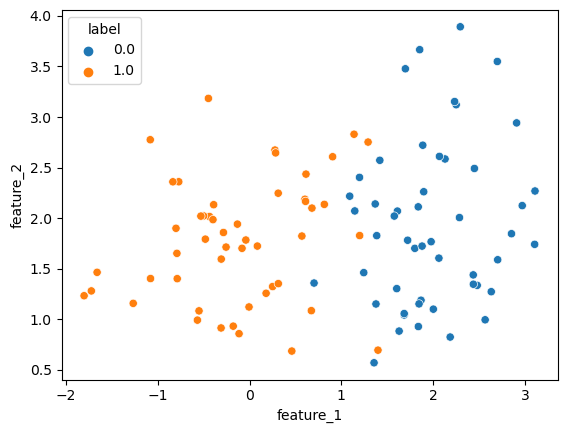

In [5]:
sns.scatterplot(data=df,x="feature_1",y="feature_2",hue="label") 

#### splitting the data into input and output features as x and y 

In [99]:
## splitting the data into input and output
x=df[["feature_1","feature_2"]]

## typecasting label column as int 
y=df["label"].astype(int)

In [100]:
y.head()

0    1
1    0
2    0
3    1
4    1
Name: label, dtype: int32

#### splitting the data into train and test 

In [101]:
X_train,X_test,y_train,y_test=train_test_split(x,y,train_size=0.9)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(89, 2) (89,)
(10, 2) (10,)


#### scaling the input features of both X_train,X_test 

In [102]:
scalar=StandardScaler()

### scaling X_train
X_train=scalar.fit_transform(X_train)



## scaling X_test 
X_test=scalar.transform(X_test)

#### building the logical structure 

In [115]:
model=Sequential()
model.add(Dense(6,activation="tanh",input_dim=2))
model.add(Dense(3,activation="tanh"))
model.add(Dense(1,activation="sigmoid"))
 

In [116]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 6)                 18        
                                                                 
 dense_31 (Dense)            (None, 3)                 21        
                                                                 
 dense_32 (Dense)            (None, 1)                 4         
                                                                 
Total params: 43 (172.00 Byte)
Trainable params: 43 (172.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### compiling the model 

In [117]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(X_train,y_train,batch_size=10,epochs=35,validation_split=0.1)

Epoch 1/35
8/8 [==============================] - 1s 47ms/step - loss: 0.6571 - accuracy: 0.6375 - val_loss: 0.6380 - val_accuracy: 0.6667
Epoch 2/35
8/8 [==============================] - 0s 11ms/step - loss: 0.6489 - accuracy: 0.7000 - val_loss: 0.6309 - val_accuracy: 0.6667
Epoch 3/35
8/8 [==============================] - 0s 11ms/step - loss: 0.6403 - accuracy: 0.7375 - val_loss: 0.6237 - val_accuracy: 0.6667
Epoch 4/35
8/8 [==============================] - 0s 11ms/step - loss: 0.6319 - accuracy: 0.7375 - val_loss: 0.6166 - val_accuracy: 0.6667
Epoch 5/35
8/8 [==============================] - 0s 10ms/step - loss: 0.6237 - accuracy: 0.7500 - val_loss: 0.6094 - val_accuracy: 0.7778
Epoch 6/35
8/8 [==============================] - 0s 10ms/step - loss: 0.6154 - accuracy: 0.7875 - val_loss: 0.6022 - val_accuracy: 0.7778
Epoch 7/35
8/8 [==============================] - 0s 10ms/step - loss: 0.6070 - accuracy: 0.8125 - val_loss: 0.5950 - val_accuracy: 0.8889
Epoch 8/35
8/8 [===========

#### plotting the train test loss 

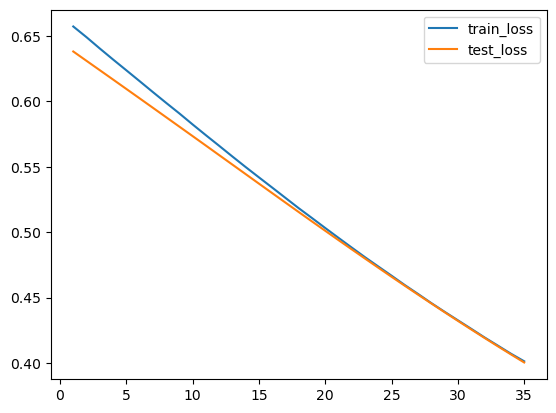

In [118]:
plt.plot(range(1,36),history.history["loss"],label="train_loss")
plt.plot(range(1,36),history.history["val_loss"],label="test_loss") 
plt.legend() 

#### finding the predicted values using model 

In [119]:
predicted=model.predict(X_test)
predicted

1/1 [==============================] - 0s 117ms/step


array([[0.26449305],
       [0.58254397],
       [0.29340333],
       [0.2947966 ],
       [0.50181186],
       [0.36244613],
       [0.2716938 ],
       [0.30384675],
       [0.36578268],
       [0.79254484]], dtype=float32)

#### converting the predicted probablities to the respective labels

In [120]:
predicted=np.where(predicted>0.5,1,0)
predicted 

array([[0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1]])

#### evaluating the model 

1.0


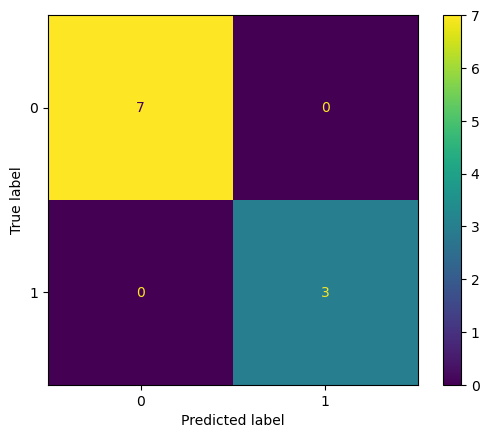

In [121]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show() 

#### creating the decision surface 

In [122]:
from mlxtend.plotting  import plot_decision_regions


9600/9600 [==============================] - 18s 2ms/step


<Axes: >

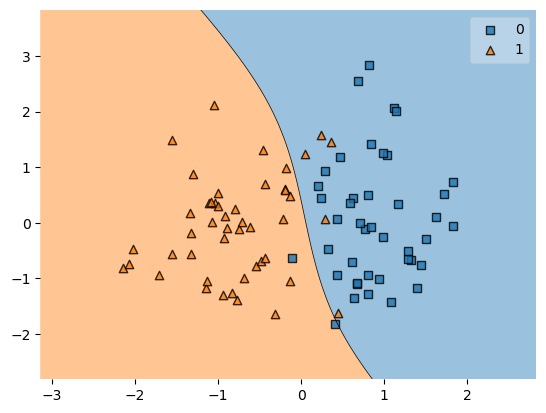

In [123]:
plot_decision_regions(X_train,y_train.values,clf=model)

9600/9600 [==============================] - 20s 2ms/step


<Axes: >

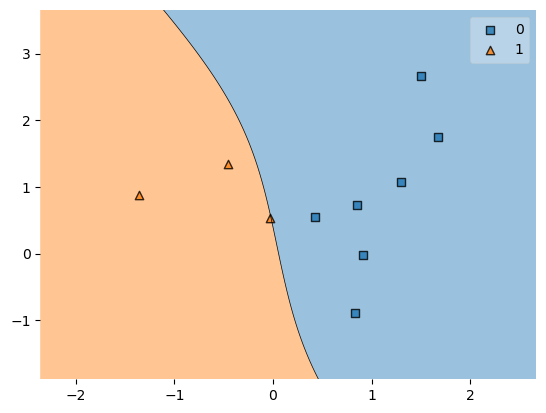

In [124]:
#for test data 
plot_decision_regions(X_test,y_test.values,clf=model)

#### Model Summary 


- This neural network model is showing accuracy of 100 percent
- We have used 2 hidden layers.
- In the First Hidden layers we have used 6 neurons and activation function as tanh.
- In the second hidden layers we have used 3 neurons and activation function as tanh.
- In the output layer we have used sigmoid as the activation function. 
- For compiling the model we haved loss as binary cross entropy,optimizer as SGD with batch size of 10 with learning rate of 0.01. 
- No of epochs used for training this model is 35.